<a href="https://colab.research.google.com/github/jgkorman/Statistical-Analysis-In-Python/blob/main/Assignment1_PDLA_Korman_JamesG_ICPSR_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ICPSR PDLA Assignment 1**
Author: Korman, James, G

*Note: This Assignment uses WDI World Bank Data for questions 1 & 2 & income dynamics dataset for questions 3 and 4*

## **Reading in the Data & Descriptive Statistics**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
fname = "/content/drive/MyDrive/Delaware/ICPSR_2022/Panel Data And Longitudinal Analysis/Assignments/Assignment 1_Topics 1 & 2/Copy of wdi_subset.csv"
wdi = pd.read_csv(fname)
wdi

,countryname,countrycode,year,agedepratio,birthrateper1000,expenditures_pcgdp,fdi_pcgdp,gdpgrowth,gdppercapita,gdpgrowth_neg
0,Brazil,BRA,1971,82.931709,34.653999,NaN,NaN,11.295087,5095.5425,0
1,Brazil,BRA,1972,81.901657,34.112000,NaN,NaN,12.052802,5572.0273,0
2,Brazil,BRA,1973,80.826630,33.674999,NaN,NaN,13.978692,6199.8232,0
3,Brazil,BRA,1974,79.637421,33.337002,NaN,NaN,9.042120,6600.5220,0
4,Brazil,BRA,1975,78.337425,33.083000,NaN,1.052467,5.209076,6780.2622,0
...,...,...,...,...,...,...,...,...,...,...
465,United Kingdom,GBR,2013,54.015648,12.100000,39.776093,1.978278,2.046355,40248.7660,0
466,United Kingdom,GBR,2014,54.782848,12.000000,38.965351,1.940550,2.947560,41124.1450,0
467,United Kingdom,GBR,2015,55.535969,11.900000,38.110355,1.565155,2.349121,41756.9220,0
468,United Kingdom,GBR,2016,56.174866,11.800000,37.084900,9.995738,1.789236,42201.6410,0


In [3]:
# variable types
wdi.dtypes

countryname            object
countrycode            object
year                    int64
agedepratio           float64
birthrateper1000      float64
expenditures_pcgdp    float64
fdi_pcgdp             float64
gdpgrowth             float64
gdppercapita          float64
gdpgrowth_neg           int64
dtype: object

In [4]:
# summary stats
wdi.describe()

,year,agedepratio,birthrateper1000,expenditures_pcgdp,fdi_pcgdp,gdpgrowth,gdppercapita,gdpgrowth_neg
count,470.000000,470.000000,470.000000,376.000000,456.000000,470.000000,470.000000,470.000000
mean,1994.000000,64.766066,23.004217,27.738440,2.718764,3.309507,16843.684048,0.142553
std,13.579114,14.034936,9.579060,8.984577,5.498050,3.726628,15465.448237,0.349989
min,1971.000000,43.471035,10.000000,10.088495,-5.670921,-12.431629,701.535520,0.000000
25%,1982.000000,53.491340,14.401250,19.544362,0.402852,1.576223,5780.715075,0.000000
50%,1994.000000,59.631450,21.086001,29.583241,1.403700,3.327364,8763.318350,0.000000
75%,2006.000000,75.242514,31.300751,34.666672,3.141611,5.214362,27215.631250,0.000000
max,2017.000000,101.301320,46.403000,62.190903,80.852646,25.117250,74498.383000,1.000000


## **Question 1**
"Summarize within and between variance by hand for age dependency ratio (agedepratio). Do you find that
between or within variance is larger?"

### **a. Grand mean**

In [5]:
wdi['agedepratio'].mean()

64.76606575531915

### **b. Unit Means**

In [6]:
unitmeans = wdi.groupby("countryname").mean()['agedepratio']
unitmeans

countryname
Brazil            61.022698
Ghana             84.805732
Ireland           58.200692
Mexico            74.777183
New Zealand       54.757374
Peru              70.784831
South Africa      67.924208
Sweden            55.490612
Turkey            65.246483
United Kingdom    54.650844
Name: agedepratio, dtype: float64

### **c. Calculate Overall Variance**

In [7]:
# calculating the grandmean
grandmean = wdi['agedepratio'].mean()
print(grandmean)
# calculating the variance by hand
var_long = sum((wdi['agedepratio'] - grandmean)**2) / (len(wdi['agedepratio']) - 1)
print(var_long)
# calculating the variance the short way (just squaring the std)
var_short = wdi['agedepratio'].std()**2
print(var_short)

64.76606575531915
196.9794225672902
196.97942256729016


### **d. Calculate Within-Group Variance**

In [8]:
# creating a dictionary of the unitmeans variable created above to map them into a new column 
unitmeans_dictionary = unitmeans.to_dict()
print(unitmeans_dictionary)

# mapping the country grouped unit means to create a new column with averages for all of our country groups 
wdi["unit_means"] = wdi["countryname"].map(unitmeans_dictionary)

# caculating within group variance (in this case within country variance since countries are our groups)
print("\n")

f"the total within group variance = {sum((wdi['agedepratio'] - wdi['unit_means'])**2 / len(wdi['agedepratio'] - 1))}"

{'Brazil': 61.022698382978724, 'Ghana': 84.80573210638298, 'Ireland': 58.20069176595745, 'Mexico': 74.77718340425531, 'New Zealand': 54.757374468085104, 'Peru': 70.78483134042553, 'South Africa': 67.92420774468086, 'Sweden': 55.490611829787234, 'Turkey': 65.24648274468085, 'United Kingdom': 54.65084376595745}




'the total within group variance = 107.171967200264'

### **e. Calculating between-group variance**

In [9]:
print(unitmeans)
print("\n")

# the between group variance
f"The between group variance = {sum((unitmeans - grandmean)**2) / (len(unitmeans) - 1)}" 

countryname
Brazil            61.022698
Ghana             84.805732
Ireland           58.200692
Mexico            74.777183
New Zealand       54.757374
Peru              70.784831
South Africa      67.924208
Sweden            55.490612
Turkey            65.246483
United Kingdom    54.650844
Name: agedepratio, dtype: float64




'The between group variance = 99.3203891251417'

### **Answer for Q1** 
Overall, I find that within group variance is larger in this case for the variable "agedepratio" with a value of 107.17 relative to a value of 99.32 for the between group variance. This suggests to us that there is more variability in "agedepratio" within our country groups rather than between our various countries. Overall, this is suggestive of no evidence between our various country-level groups.

## **Question 2**
"Create a plot of age dependency ratio. Do you notice any particular patterns or trends?"

In [10]:
wdi.dtypes

countryname            object
countrycode            object
year                    int64
agedepratio           float64
birthrateper1000      float64
expenditures_pcgdp    float64
fdi_pcgdp             float64
gdpgrowth             float64
gdppercapita          float64
gdpgrowth_neg           int64
unit_means            float64
dtype: object

In [11]:
# creating a list of country names for mapping 
countries = list(wdi['countryname'].unique())
# creating a list of colors to correspond to the list of country names above for our 10 countries and 10 colors to add to the dataframe 
colors = ['brown', 'red', 'gold', 'yellow', 'green', 'lawngreen', 'aqua', 'steelblue', 'purple', 'navy']

# putting the two lists created above into one dictionary
color_dictionary = dict(zip(countries, colors))
print(color_dictionary)

# adding the colors column to the dataframe to correspond to a different color for each country
wdi['colors'] = wdi['countryname'].map(color_dictionary)
wdi

{'Brazil': 'brown', 'Ghana': 'red', 'Ireland': 'gold', 'Mexico': 'yellow', 'New Zealand': 'green', 'Peru': 'lawngreen', 'South Africa': 'aqua', 'Sweden': 'steelblue', 'Turkey': 'purple', 'United Kingdom': 'navy'}


,countryname,countrycode,year,agedepratio,birthrateper1000,expenditures_pcgdp,fdi_pcgdp,gdpgrowth,gdppercapita,gdpgrowth_neg,unit_means,colors
0,Brazil,BRA,1971,82.931709,34.653999,NaN,NaN,11.295087,5095.5425,0,61.022698,brown
1,Brazil,BRA,1972,81.901657,34.112000,NaN,NaN,12.052802,5572.0273,0,61.022698,brown
2,Brazil,BRA,1973,80.826630,33.674999,NaN,NaN,13.978692,6199.8232,0,61.022698,brown
3,Brazil,BRA,1974,79.637421,33.337002,NaN,NaN,9.042120,6600.5220,0,61.022698,brown
4,Brazil,BRA,1975,78.337425,33.083000,NaN,1.052467,5.209076,6780.2622,0,61.022698,brown
...,...,...,...,...,...,...,...,...,...,...,...,...
465,United Kingdom,GBR,2013,54.015648,12.100000,39.776093,1.978278,2.046355,40248.7660,0,54.650844,navy
466,United Kingdom,GBR,2014,54.782848,12.000000,38.965351,1.940550,2.947560,41124.1450,0,54.650844,navy
467,United Kingdom,GBR,2015,55.535969,11.900000,38.110355,1.565155,2.349121,41756.9220,0,54.650844,navy
468,United Kingdom,GBR,2016,56.174866,11.800000,37.084900,9.995738,1.789236,42201.6410,0,54.650844,navy


Text(0, 0.5, 'agedepratio')

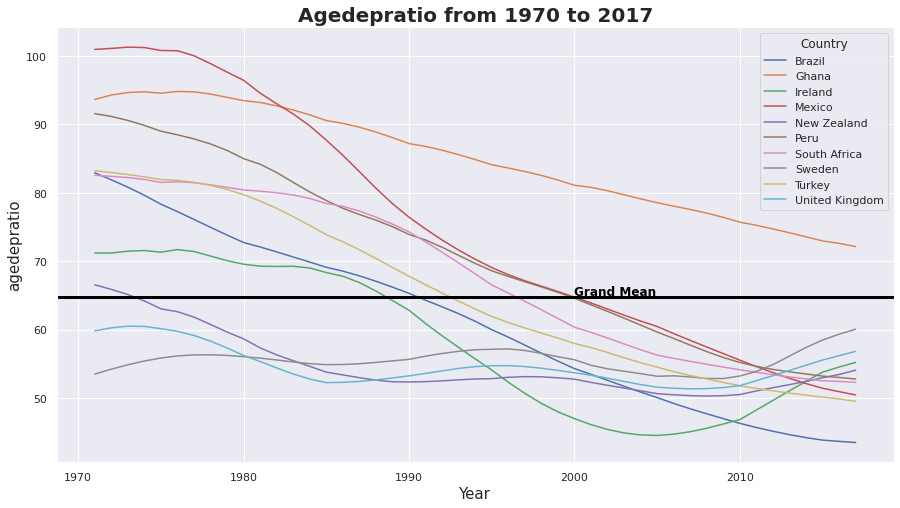

In [12]:
# Line plot examining the series for our 10 different countries over time 
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='year', y='agedepratio', data=wdi, hue='countryname', legend=False)
plt.axhline(grandmean, color='black', lw=3, label='Grand Mean')
plt.text(2000, 65, "Grand Mean", size='medium', color='black', weight='semibold')

plt.legend(title='Country', loc='upper right', labels = countries)
plt.title("Agedepratio from 1970 to 2017", fontsize=20, weight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('agedepratio', fontsize=15)


### **Answer for Q2**
Overall, in analyzing the figure above that plots the agedepratio over time, we notice that for the 10 countries examined, all countries are showing a a continual shift downward in their values but it appears that developing countries such as Ghana and Mexico shown in orange and red respectively, have a very sharp downturn overtime whereas the values for advanced industrialized democracies such as the UK and New Zealand shown in blue and purple respectively, remain relatively stable overtime with some flucations across the years but their series are rather stationary. Overall, however, the trend is clearly downward over time. 

## **Quesion 3**
"Now use the Panel Study of Income Dynamics data (PSID_long_data.dta). id is the unit identifier, while
wave is the time varible. Choose one variable (may want to pick a continuous one) and summarize within and
between variance by hand. (note: you might have issues in R with missing values. You can drop them for the
purposes of this assignment, e.g., psidn<-npsid[complete.cases(psid$variable),], where variable is
the variable name you’re interested in)."

In [13]:
# reading in the dta file in python 

dtafile = '/content/drive/MyDrive/Delaware/ICPSR_2022/Panel Data And Longitudinal Analysis/Assignments/Assignment 1_Topics 1 & 2/Copy of PSID_long_data.dta'
income_dynamics = pd.read_stata(dtafile, convert_categoricals=False)
income_dynamics

,id,wave,paeduc,maeduc,race,totinc,age,educ,SRH,male,marital,evsmoke
0,4003.0,7,2.0,2.0,1.0,89560.0,55.0,9.0,NaN,1.0,1.0,0.0
1,4003.0,9,2.0,2.0,1.0,24960.0,57.0,10.0,NaN,1.0,1.0,0.0
2,4003.0,11,2.0,2.0,1.0,40416.0,59.0,10.0,NaN,1.0,1.0,0.0
3,4003.0,13,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0
4,4003.0,15,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84799,6872183.0,9,2.0,4.0,2.0,94210.0,29.0,12.0,NaN,1.0,1.0,1.0
84800,6872183.0,11,2.0,4.0,2.0,85000.0,31.0,12.0,NaN,1.0,1.0,1.0
84801,6872183.0,13,2.0,4.0,2.0,91000.0,33.0,14.0,NaN,1.0,1.0,1.0
84802,6872183.0,15,2.0,4.0,2.0,112000.0,35.0,14.0,NaN,1.0,1.0,1.0


In [14]:
# printing both variable types and missing value counts 
print(income_dynamics.dtypes), print("\n"), print(income_dynamics.isna().sum())

id         float32
wave          int8
paeduc     float32
maeduc     float32
race       float64
totinc     float64
age        float32
educ       float32
SRH        float64
male       float32
marital    float32
evsmoke    float32
dtype: object


id             0
wave           0
paeduc     27324
maeduc     22338
race        5928
totinc     12255
age        16626
educ       21931
SRH        78463
male           0
marital       60
evsmoke     5448
dtype: int64


(None, None, None)

In [15]:
# dropping all NaNs
income_dynamics = income_dynamics.dropna()
income_dynamics

,id,wave,paeduc,maeduc,race,totinc,age,educ,SRH,male,marital,evsmoke
60,4039.0,7,2.0,2.0,1.0,89560.0,16.0,10.0,5.0,0.0,5.0,0.0
61,4039.0,9,2.0,2.0,1.0,24960.0,18.0,12.0,5.0,0.0,5.0,0.0
165,5031.0,13,4.0,6.0,1.0,77513.0,29.0,13.0,5.0,1.0,4.0,1.0
167,5031.0,17,4.0,6.0,1.0,91000.0,34.0,13.0,5.0,1.0,4.0,1.0
170,5033.0,11,3.0,3.0,1.0,34000.0,16.0,10.0,5.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84663,6864035.0,13,3.0,3.0,2.0,38400.0,21.0,12.0,5.0,0.0,2.0,1.0
84684,6867003.0,7,3.0,3.0,2.0,141660.0,55.0,12.0,5.0,1.0,4.0,1.0
84685,6867003.0,9,3.0,3.0,2.0,66990.0,57.0,12.0,5.0,1.0,4.0,1.0
84690,6867004.0,7,3.0,3.0,2.0,141660.0,52.0,12.0,5.0,1.0,2.0,1.0


In [16]:
# checking to make sure there is no NaN left over in the dataset 
income_dynamics.isna().sum()

id         0
wave       0
paeduc     0
maeduc     0
race       0
totinc     0
age        0
educ       0
SRH        0
male       0
marital    0
evsmoke    0
dtype: int64

I am choosing the 'age' variable for the analysis 

### **a. Grand Mean**

In [17]:
grand_mean = income_dynamics['age'].mean()
grand_mean

22.74257

### **b. Unit Means**

In [18]:
unitmeans = income_dynamics.groupby("id").mean()['age']
unitmeans

id
4039.0       17.0
5031.0       31.5
5033.0       16.0
5183.0       54.0
7042.0       18.0
             ... 
6864033.0    28.0
6864034.0    24.0
6864035.0    19.0
6867003.0    56.0
6867004.0    53.0
Name: age, Length: 1567, dtype: float32

### **c. Calculate Overall Variance**


In [19]:
# calculating the grandmean
grandmean = income_dynamics['age'].mean()
print(grandmean)
# calculating the variance by hand
var_long = sum((income_dynamics['age'] - grandmean)**2) / (len(income_dynamics['age']) - 1)
print(var_long)
# calculating the variance the short way (just squaring the std)
var_short = income_dynamics['age'].std()**2
print(var_short)

22.74257
77.23720116397728
77.2371928932298


### **d. Calculate Within Group Variance**

In [20]:
# creating a dictionary of the unitmeans variable created above to map them into a new column 
unitmeans_dictionary = unitmeans.to_dict()
print(unitmeans_dictionary)

# mapping the country grouped unit means to create a new column with averages for all of our country groups 
income_dynamics["unit_means"] = income_dynamics["id"].map(unitmeans_dictionary)

# caculating within group variance (in this case within country variance since countries are our groups)
print("\n")

f"the total within group variance = {sum((income_dynamics['age'] - income_dynamics['unit_means'])**2 / len(income_dynamics['age'] - 1))}"

{4039.0: 17.0, 5031.0: 31.5, 5033.0: 16.0, 5183.0: 54.0, 7042.0: 18.0, 7043.0: 18.0, 7044.0: 17.0, 7045.0: 18.0, 7049.0: 16.0, 7171.0: 59.0, 7206.0: 20.0, 10034.0: 17.0, 10035.0: 18.66666603088379, 10185.0: 26.0, 10186.0: 24.0, 14030.0: 23.0, 14032.0: 16.0, 14033.0: 16.0, 14179.0: 32.0, 16174.0: 17.0, 18035.0: 41.0, 18041.0: 19.5, 19171.0: 26.5, 19175.0: 43.0, 40191.0: 48.0, 41182.0: 52.0, 41200.0: 39.0, 45034.0: 17.0, 47036.0: 19.0, 50032.0: 21.33333396911621, 50033.0: 20.0, 53040.0: 16.5, 57032.0: 17.0, 57033.0: 16.0, 57179.0: 45.0, 60036.0: 17.0, 61032.0: 19.0, 61034.0: 18.66666603088379, 84036.0: 17.0, 84188.0: 25.0, 88036.0: 20.0, 89034.0: 19.0, 96031.0: 26.0, 99032.0: 18.0, 105038.0: 19.33333396911621, 128030.0: 18.33333396911621, 133176.0: 29.0, 138032.0: 18.0, 138033.0: 17.0, 145030.0: 18.0, 145031.0: 18.0, 151006.0: 52.0, 151178.0: 31.0, 165032.0: 24.0, 172036.0: 17.0, 173033.0: 23.0, 173038.0: 17.0, 173039.0: 17.0, 173040.0: 16.0, 173180.0: 20.0, 174035.0: 24.0, 174036.0: 18.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'the total within group variance = 2.3954618751440253'

### **e. Calculate Between Group Variance**

In [21]:
print(unitmeans)
print("\n")

# the between group variance
f"The between group variance = {sum((unitmeans - grandmean)**2) / (len(unitmeans) - 1)}" 

id
4039.0       17.0
5031.0       31.5
5033.0       16.0
5183.0       54.0
7042.0       18.0
             ... 
6864033.0    28.0
6864034.0    24.0
6864035.0    19.0
6867003.0    56.0
6867004.0    53.0
Name: age, Length: 1567, dtype: float32




'The between group variance = 84.9774750875952'

## **Question 4**
"Do you find that within or between variance is larger? Why do you think this is?"

For the Income Dyanmics dataset analysis as was carried out in Question 3, I find that the between group variance is larger in this case relative to the within-group variance for the variable "age". This is more plausible because in this case, we have less of a temporal dimension as we had in the analysis as it pertained to questions 1 & 2 with WDI data. Whereas in this data on income_dynamics, time points weren't as structured and consistent and it is plausible that within some group id's there is only one or a couple of observations which doesn't give much breathing room over time for a very substantive change in within group variance. Therefore, it is plausible that the between group variance that measures the variance between our unique groups is larger in this case. Moreover, this is also suggestive to us that group level effects do matter. 